In [42]:
% t_colorThresholdEllipsoids
%
% We can represent color stimuli in a three-dimensional space that gives
% the contrast of the L, M, and S cone signals relative to a background.
% Indeed, a simple modulation around the background is specified by the
% color direction of the modulation, specified as a unit vector in the
% contrast space, and the length of the modulation.
%
% If we fix the spatial and temporal properties of a pattern and consider
% how color thresholds vary with color direction, it is a reasonable
% empirical generalization that the threshold point will lie on the surface
% of an ellipsoid in the cone contrast space.  The ellipsoidal
% characterizatoin may not be perfect, but it certainly captures major
% features of the data across many studies.
%
% This routine generates and plots such thresholds based on data and a
% model reported by Poirson & Wandell:
%    Poirson AB, Wandell BA. 1996. Pattern-color separable pathways predict
%    sensitivity to simple colored patterns Vision Res 36: 515-26.
%
% This paper reports measurements of color thresholds in many directions in
% color space for a variety of spatial frequencies between 0.5 and 8 cycles
% per degree.  The paper reports that the data are well-described by
% ellipsoids, and that the the effect of spatial frequency can be captured
% by a model that assumes that the effect of pattern (spatial frequency in
% this case) on thresholds is separable from the effect of color direction.
%
% The paper provides the parameters of a model based on the separability
% principle, and these parameters allow us to generate the threshold
% ellipsoid for each spatial frequency measured.  This tutorial recreates
% Figures 3 and 8 of the paper (but without the data points), and also produces a
% rotating 3D plot of the full ellipsoid whose sections are shown in Figure 3.

In [43]:
%% Clear and close
clear; close all;

% Turn off an irritating plot warning
s = warning('off','MATLAB:delaunay:DupPtsDelaunayWarnId');

In [44]:
%% Get the pattern-color model parameters from the tables in the paper
%
% The paper gives us (in Tables 2 and 3) the for a matrix A that converts cone
% excitations to a mechanism space in which the threshold contour is a unit
% sphere. 
%
% The called routine returns this matrix, as well as its inverse and a
% matrix Q = A'*A. The routine also returns the cone coordinates of the
% experimental background, which we need to convert the contour expressed
% as differential cone excitations to contrast.
%
% The figures in the paper are for subject HT, constant cycles condiion.
% Or at least Figure 3 is.  It is less clear for Figure 8, but we'll assume
% it is the same subject and condition as Figure 3.  Our reproduction of
% that figure looks pretty good, based on this assumption.
conditionStr = 'HT,cc';
theSf = 2;
[A,Ainv,Q,theBgLMS] = PoirsonWandellEllipsoidParameters(conditionStr,theSf);

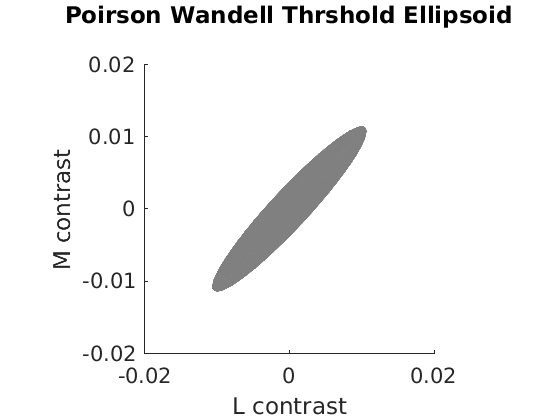

In [45]:
%% Generate and plot the ellipsoid in 3D
%
% Since the matrix A converts thresholds to a color space where they are
% the unit sphere, the matrix inv(A) takes the unit sphere to the threshold
% ellipsoid.  To produce a plottable ellipsoid, we generate a pile of
% points on the unit sphere and apply inv(A).  Note that the vector length
% in the transformed space of a cone-space vector x is given by ||Ax|| =
% x'*A'*A*x = x'*Q*x.  For threshold vectors, this length is 1.
%
% The threshold ellipsoid comes back in cone difference coordinates,
% not contrast, the way the parameters are provided in the paper.
% So, divide by the background to get a cone contrast threshold ellipsoid.
nThetaEllipsoid = 50;
nPhiEllipsoid = 50;
xSphere = UnitSphereGenerate(nThetaEllipsoid,nPhiEllipsoid);
xEllipsoid = Ainv*xSphere;
xEllipsoid = bsxfun(@times,xEllipsoid,1./theBgLMS);

% Plot the model ellipsoid as a nice surface
xCoords = squeeze(xEllipsoid(1,:));
yCoords = squeeze(xEllipsoid(2,:));
zCoords = squeeze(xEllipsoid(3,:));
tri = delaunay(xCoords, yCoords, zCoords);
figure; clf; hold on; set(gca,'FontSize',10);
h = trisurf(tri, xCoords, yCoords, zCoords);
set(h,'FaceAlpha',0.25)
set(h,'EdgeColor',[0.5 0.5 0.5])
set(h,'FaceColor',[0.6 0.6 0.6]);
lighting phong;
xlabel('L contrast'); ylabel('M contrast'); zlabel('S contrast'); title({'Poirson Wandell Thrshold Ellipsoid' ''});
xlim([-0.02 0.02]); ylim([-0.02 0.02]); zlim([-0.04 0.04]);
axis('square');

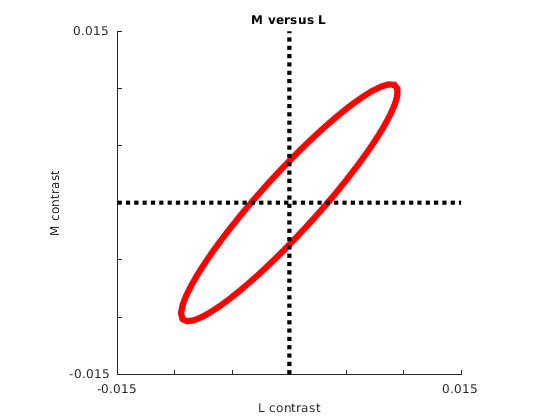

In [46]:
%% Generate 2D slices 
%
% This plot reproduces Figure 3 in the Poirson & Wandell paper, and
% gives us reason to believe we understand the model and how its parameters
% are specified in the paper.
%
% To control where the points end up, here we find the points in a
% different way.  We specify directions in color space and then find how
% long the vectors in each direction have to be to satisfy x'*Q*x = 1.
% This is done by routine PointsOnEllipsoidFind. Here, then, we generate circles
% in the (L,M), (L,S), and (M,S) planes and then adjust the length in each
% direction to give us the points in that plane that are on the ellipsoid.
nThetaEllipse = 200;
xCircle = UnitCircleGenerate(nThetaEllipse);
xCirclePlane = [xCircle(1,:) ; xCircle(2,:) ; zeros(size(xCircle(1,:)))];
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);

% This is the first panel (L versus M)
figure; clf; hold on; figFontSize = 6;
set(gca,'FontSize',figFontSize);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'r','LineWidth',3);
plot([-0.015 0.015],[0 0],'k:','LineWidth',2);
plot([0 0],[-0.015 0.015],'k:','LineWidth',2);
xlabel('L contrast','FontSize',figFontSize); ylabel('M contrast','FontSize',figFontSize);
title('M versus L','FontSize',figFontSize);
xlim([-0.015 0.015]); ylim([-0.015 0.015]);
set(gca,'XTick',[-0.015 -0.010 -0.005 0 0.005 0.010 0.015]);
set(gca,'XTickLabel',{'-0.015' '' '' '' '' '' '0.015'});
set(gca,'YTick',[-0.015 -0.010 -0.005 0 0.005 0.010 0.015]);
set(gca,'YTickLabel',{'-0.015' '' '' '' '' '' '0.015'});
axis('square');

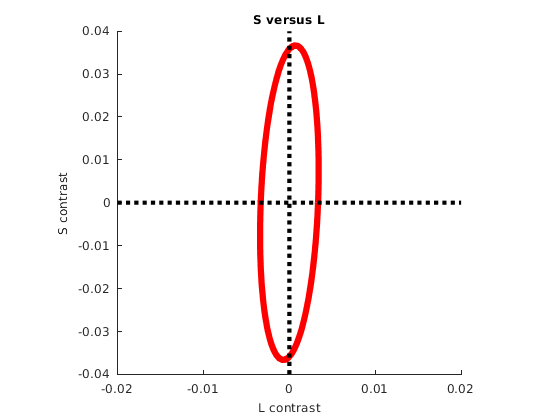

In [47]:
% Second panel (S versus L)
figure; clf; hold on; figFontSize = 6;
set(gca,'FontSize',figFontSize);
xCircle = UnitCircleGenerate(nThetaEllipse);
xCirclePlane = [xCircle(1,:) ; zeros(size(xCircle(1,:))) ; xCircle(2,:) ];
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
set(gca,'FontSize',figFontSize);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(3,:),'r','LineWidth',3);
plot([-0.02 0.02],[0 0],'k:','LineWidth',2);
plot([0 0],[-0.04 0.04],'k:','LineWidth',2);
xlabel('L contrast','FontSize',figFontSize); ylabel('S contrast','FontSize',figFontSize);
title('S versus L','FontSize',figFontSize);
xlim([-0.02 0.02]); ylim([-0.04 0.04]);
axis('square');

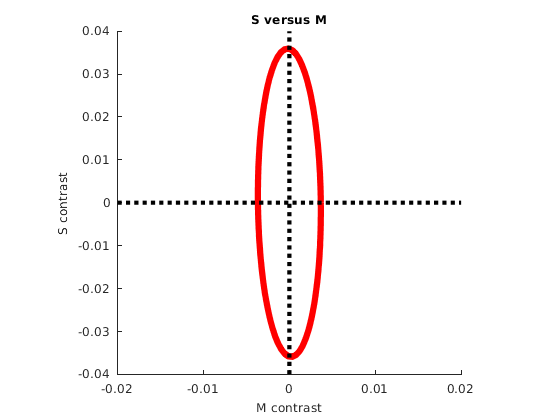

In [48]:
% And S versus M
figure; clf; hold on; figFontSize = 6;
set(gca,'FontSize',figFontSize);
xCirclePlane = [zeros(size(xCircle(1,:))) ; xCircle(1,:) ; xCircle(2,:)];
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
set(gca,'FontSize',figFontSize);
plot(xEllipsoidPlane(2,:),xEllipsoidPlane(3,:),'r','LineWidth',3);
plot([-0.02 0.02],[0 0],'k:','LineWidth',2);
plot([0 0],[-0.04 0.04],'k:','LineWidth',2);
xlabel('M contrast','FontSize',figFontSize); ylabel('S contrast','FontSize',figFontSize);
title('S versus M','FontSize',figFontSize);
xlim([-0.02 0.02]); ylim([-0.04 0.04]);
axis('square');

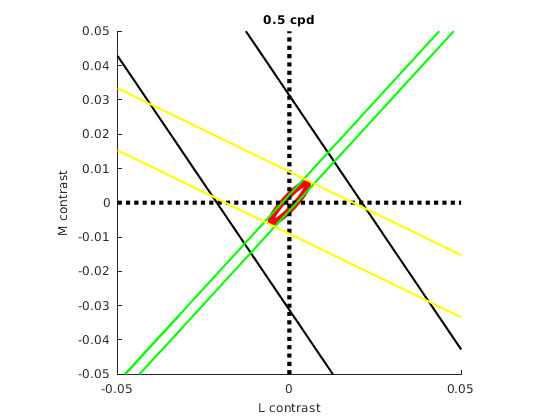

In [49]:
%% Reproduce Figure 8.
%
% This is done with the same technique as we used for reproducing Figure 3,
% but here we just look at the L,M plane at 3 spatial frequencies.
conditionStr = 'HT,cc';
theSf = 0.5;
[A,Ainv,Q,theBgLMS] = PoirsonWandellEllipsoidParameters(conditionStr,theSf);
nThetaEllipse = 200;
xCircle = UnitCircleGenerate(nThetaEllipse);
xCirclePlane = [xCircle(1,:) ; xCircle(2,:) ; zeros(size(xCircle(1,:)))];
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
fig8A = figure; clf; hold on
set(gca,'FontSize',figFontSize);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'r','LineWidth',3);
plot([-0.05 0.05],[0 0],'k:','LineWidth',2);
plot([0 0],[-0.05 0.05],'k:','LineWidth',2);
xlabel('L contrast','FontSize',figFontSize); ylabel('M contrast','FontSize',figFontSize);
title('0.5 cpd','FontSize',figFontSize);
xlim([-0.05 0.05]); ylim([-0.05 0.05]);
axis('square');

%% Figure 8 also shows the thresholds for individual mechanisms.
%
% Since we're on a roll, let's add those.  One way to do this is to
% zero out two of the three rows of A, construct the corresponding Q,
% and proceed as above.  The code is length because each of the 
% three cases for each subplot is just hard-coded here.
%
% This does the first panel (0.5 cpd)
%
% An enterprising person could also add the single mechanism planes to the
% figure with the 3D threshold ellipsoid.
nThetaEllipse = 200;
xCircle = UnitCircleGenerate(nThetaEllipse);
xCirclePlane = [xCircle(1,:) ; xCircle(2,:) ; zeros(size(xCircle(1,:)))];
Aadjusted = A;
Aadjusted(2,:) = 0;
Aadjusted(3,:) = 0;
Q = Aadjusted'*Aadjusted;
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'k','LineWidth',1);
Aadjusted = A;
Aadjusted(1,:) = 0;
Aadjusted(3,:) = 0;
Q = Aadjusted'*Aadjusted;
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'g','LineWidth',1);
Aadjusted = A;
Aadjusted(1,:) = 0;
Aadjusted(2,:) = 0;
Q = Aadjusted'*Aadjusted;
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'y','LineWidth',1);

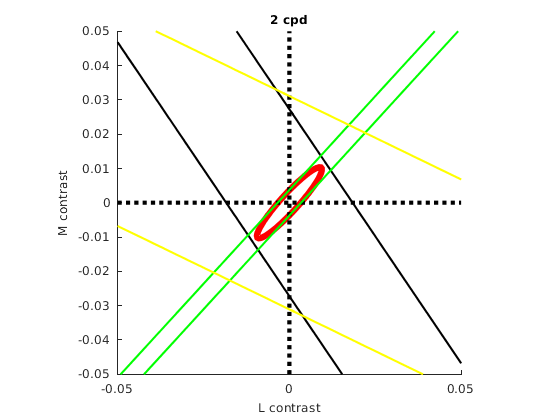

In [50]:
%% Here's the second panel of Figure 8, for 2 cpd.  Logic is just the same as the 
% 0.5 cpd case above.
theSf = 2;
[A,Ainv,Q,theBgLMS] = PoirsonWandellEllipsoidParameters(conditionStr,theSf);
nThetaEllipse = 200;
xCircle = UnitCircleGenerate(nThetaEllipse);
xCirclePlane = [xCircle(1,:) ; xCircle(2,:) ; zeros(size(xCircle(1,:)))];
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
fig8B = figure; clf; hold on
set(gca,'FontSize',figFontSize);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'r','LineWidth',3);
plot([-0.05 0.05],[0 0],'k:','LineWidth',2);
plot([0 0],[-0.05 0.05],'k:','LineWidth',2);
xlabel('L contrast','FontSize',figFontSize); ylabel('M contrast','FontSize',figFontSize);
title('2 cpd','FontSize',figFontSize);
xlim([-0.05 0.05]); ylim([-0.05 0.05]);
axis('square');

nThetaEllipse = 200;
xCircle = UnitCircleGenerate(nThetaEllipse);
xCirclePlane = [xCircle(1,:) ; xCircle(2,:) ; zeros(size(xCircle(1,:)))];
Aadjusted = A;
Aadjusted(2,:) = 0;
Aadjusted(3,:) = 0;
Q = Aadjusted'*Aadjusted;
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'k','LineWidth',1);
Aadjusted = A;
Aadjusted(1,:) = 0;
Aadjusted(3,:) = 0;
Q = Aadjusted'*Aadjusted;
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'g','LineWidth',1);
Aadjusted = A;
Aadjusted(1,:) = 0;
Aadjusted(2,:) = 0;
Q = Aadjusted'*Aadjusted;
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'y','LineWidth',1);

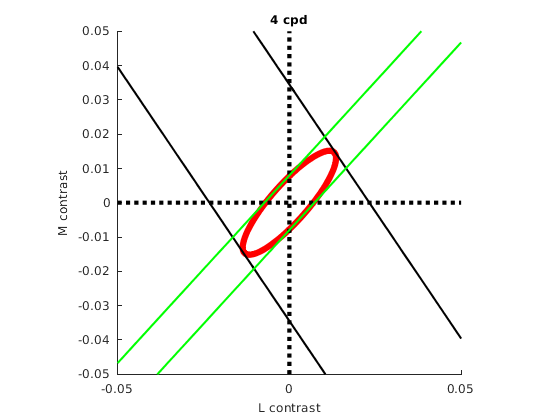

In [51]:
% And finally the third panel for theSf = 4;
theSf = 4;
[A,Ainv,Q,theBgLMS] = PoirsonWandellEllipsoidParameters(conditionStr,theSf);
nThetaEllipse = 200;
xCircle = UnitCircleGenerate(nThetaEllipse);
xCirclePlane = [xCircle(1,:) ; xCircle(2,:) ; zeros(size(xCircle(1,:)))];
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
figure; clf; hold on
set(gca,'FontSize',figFontSize);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'r','LineWidth',3);
plot([-0.05 0.05],[0 0],'k:','LineWidth',2);
plot([0 0],[-0.05 0.05],'k:','LineWidth',2);
xlabel('L contrast','FontSize',figFontSize); ylabel('M contrast','FontSize',figFontSize);
title('4 cpd','FontSize',figFontSize);
xlim([-0.05 0.05]); ylim([-0.05 0.05]);
axis('square');

nThetaEllipse = 200;
xCircle = UnitCircleGenerate(nThetaEllipse);
xCirclePlane = [xCircle(1,:) ; xCircle(2,:) ; zeros(size(xCircle(1,:)))];
Aadjusted = A;
Aadjusted(2,:) = 0;
Aadjusted(3,:) = 0;
Q = Aadjusted'*Aadjusted;
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'k','LineWidth',1);
Aadjusted = A;
Aadjusted(1,:) = 0;
Aadjusted(3,:) = 0;
Q = Aadjusted'*Aadjusted;
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'g','LineWidth',1);
Aadjusted = A;
Aadjusted(1,:) = 0;
Aadjusted(2,:) = 0;
Q = Aadjusted'*Aadjusted;
xEllipsoidPlane = PointsOnEllipsoidFind(Q,xCirclePlane);
xEllipsoidPlane = bsxfun(@times,xEllipsoidPlane,1./theBgLMS);
plot(xEllipsoidPlane(1,:),xEllipsoidPlane(2,:),'y','LineWidth',1);

In [52]:
%% Put warning back
warning(s.state,s.identifier);